<a href="https://colab.research.google.com/github/rishimurki/stock_price_predictor/blob/main/stock_price_pred_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openbb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import math
import numpy as np

import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential

from sklearn.preprocessing import MinMaxScaler

import pylab as pl

In [3]:
from openbb_terminal.sdk import openbb

libwebkit2gtk-4.0.so.37: cannot open shared object file: No such file or directory


Forecasting Toolkit is disabled. To use the Forecasting features please install the toolkit following the instructions here: https://my.openbb.co/app/sdk/installation

Portfolio Optimization Toolkit is disabled. To use the Optimization features please install the toolkit following the instructions here: https://my.openbb.co/app/sdk/installation

PyWry is not installed or missing required linux dependencies.

Install PyWry
pip install pywry --upgrade

Platform-specific notes
Here is the underlying web engine each platform uses you might need to install.

Linux
Pywry uses gtk-rs and its related libraries for window creation and Wry also needs WebKitGTK for WebView.
To activate interactive plots/tables in pywry window, please make sure the following packages are installed:

Arch Linux / Manjaro:
sudo pacman -S webkit2gtk

Debian / Ubuntu:
sudo apt install libwebkit2gtk-4.0-dev

Fedora / CentOS / AlmaLinux:
sudo dnf install gtk3-devel webkit2gtk3-devel

If you prefer to continue without interactive plots/tables, press enter or ctrl+c to exit.

In [4]:
openbb.stocks.candle('AAPL')

Loading Daily data for AAPL with starting period 2020-06-15.

In [5]:
import pandas as pd

train=openbb.stocks.load("AAPL", "2010-01-01",1440,"2017-01-01")

Loading Daily data for AAPL with starting period 2010-01-04.

In [6]:
test=openbb.stocks.load("AAPL", "2017-01-01",1440,"2019-01-01")

Loading Daily data for AAPL with starting period 2017-01-03.

In [7]:
index=[]
for i in range(len(train)):
  index.append(i)

train["index"]=index

In [8]:
index=[]
for i in range(len(test)):
  index.append(i)

test["index"]=index

In [9]:
x=[]
y=[]
x_test=[]
y_test=[]

In [10]:
close_list=[]
close_list.append(train["Close"][0])

In [11]:
test_close=[]
test_close.append(test["Close"][0])


In [12]:
for i in range(1,len(train)):
  date=int(str(train.index[i]).split()[0].split("-")[2])
  prev_date = int(str(train.index[i-1]).split()[0].split("-")[2])


  if date > (prev_date+1) and date < (prev_date+3) and date != 1:
			print("date: {}, prev: {}".format(date,prev_date))
			close_list.append(train["Close"][i-1])

  close_list.append(train["Close"][i])


date: 26, prev: 24
date: 25, prev: 23
date: 5, prev: 3
date: 23, prev: 21
date: 26, prev: 24
date: 5, prev: 3
date: 29, prev: 27
date: 26, prev: 24
date: 28, prev: 26
date: 26, prev: 24
date: 27, prev: 25
date: 25, prev: 23


In [13]:
for i in range(1,len(test)):
  date = int(str(test.index[i]).split()[0].split("-")[2])
  prev_date = int(str(test.index[i-1]).split()[0].split("-")[2])

  if date > (prev_date+1) and date < (prev_date+3) and date != 1:
    print("date: {}, prev: {}".format(date,prev_date))
    test_close.append(test["Close"][i-1])

  test_close.append(test["Close"][i])

date: 5, prev: 3
date: 24, prev: 22
date: 5, prev: 3
date: 23, prev: 21
date: 6, prev: 4
date: 26, prev: 24


In [14]:
test_close.insert(60, test_close[59])

In [15]:
for i in range(len(close_list)):
  ap=i+1
  if ap%5!=0:
    x.append(close_list[i])
  else:
    y.append(close_list[i])
    count=0


In [16]:
for i in range(len(test_close)):
  bp=i+1
  if bp%5!=0:
    x_test.append(test_close[i])
  else:
    y_test.append(test_close[i])
    count=0


In [17]:
print(len(x))
print(len(y))

1420
354


In [25]:
x=np.array(x).reshape(-1,4)
y=np.array(y).reshape(-1,1)


In [24]:
x_test=np.array(x_test).reshape(-1,4)
y_test=np.array(y_test).reshape(-1,1)

In [20]:
original = y[:]

In [26]:
x_scaler=MinMaxScaler()
y_scaler=MinMaxScaler()
y=y_scaler.fit_transform(y)
x=x_scaler.fit_transform(x)


In [27]:
x_test=x_scaler.fit_transform(x_test)
y_test=y_scaler.fit_transform(y_test)
x_test=np.array(x_test).reshape(-1,4,1)
x=np.array(x).reshape(-1,4,1)

In [28]:
x=x[:354]

In [29]:
print(len(x))
print(len(y))

354
354


In [30]:
x_test=x_test[:101]

In [31]:
print(len(x_test))
print(len(y_test))

101
101


In [94]:
from keras.layers import SimpleRNN
model = Sequential()
model.add(SimpleRNN(10, return_sequences=True,input_shape=(4, 1)))
model.add(SimpleRNN(10))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=0.01))

In [95]:
model.fit(x,y,epochs=1000,batch_size=32,verbose=0,validation_data=(x_test,y_test))

In [106]:
score = model.evaluate(x_test, y_test, verbose=1)

4/4 [==============================] - 0s 5ms/step - loss: 6.4679e-04


In [107]:
print(score)

0.0006467946222983301


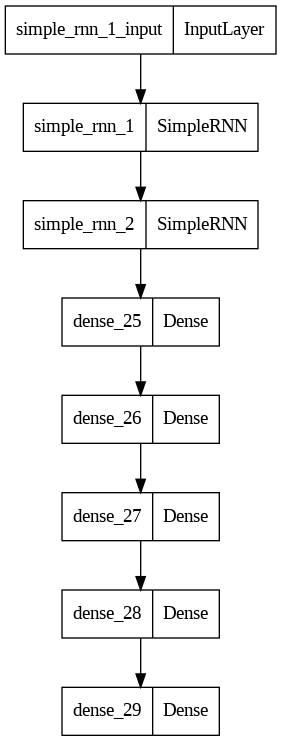

In [108]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png')

In [109]:
y_predict=model.predict(x_test,batch_size=32)

4/4 [==============================] - 0s 7ms/step


In [110]:
y_fit=model.predict(x,batch_size=32)

12/12 [==============================] - 0s 4ms/step


In [111]:
pred=y_scaler.inverse_transform(y_predict)
actual=y_scaler.inverse_transform(y_test)
fit=y_scaler.inverse_transform(y_fit)
trainy=y_scaler.inverse_transform(y)

In [112]:
diff=pred-actual

In [113]:
print("predicted | original | difference | accuracy")
for i in range(len(y_test)):
  print("{} | {} | {} | {}".format(pred[i], actual[i], diff[i] , (1-(abs(diff[i]/actual[i])))))

predicted | original | difference | accuracy
[28.140095] | [27.75837517] | [0.38171959] | [0.98624849]
[28.140095] | [27.99398804] | [0.14610672] | [0.99478078]
[28.145588] | [27.98698997] | [0.15859795] | [0.99433315]
[28.447662] | [28.30892181] | [0.13874054] | [0.99509905]
[30.429111] | [30.68374062] | [-0.25462914] | [0.9917015]
[31.214252] | [31.63446999] | [-0.42021751] | [0.98671647]
[32.201492] | [32.12413406] | [0.07735825] | [0.9975919]
[32.21156] | [32.75205612] | [-0.54049683] | [0.98349732]
[32.746124] | [32.56695557] | [0.1791687] | [0.99449845]
[32.628166] | [32.90902328] | [-0.28085709] | [0.99146565]
[32.82215] | [33.13393784] | [-0.31178665] | [0.99059011]
[33.81353] | [33.76654816] | [0.04698181] | [0.99860863]
[33.72395] | [33.9188385] | [-0.19488907] | [0.99425425]
[33.60484] | [33.18315506] | [0.42168427] | [0.98729222]
[33.154083] | [32.96057129] | [0.19351196] | [0.99412899]
[33.925423] | [33.66346359] | [0.26195908] | [0.9922183]
[34.61773] | [34.45537567] | [0

In [116]:
accuracy = 0
for i in range(len(y_test)):
  accuracy += (1-(abs(diff[i]/actual[i])))

accuracy /= len(y_test)

print("Overall accuracy: " ,accuracy)

Overall accuracy:  [0.98736985]


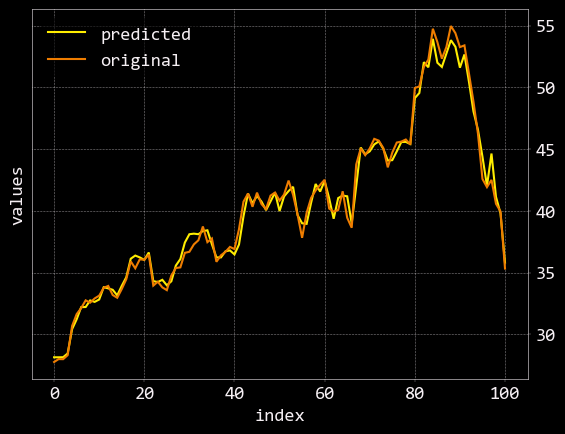

In [115]:
import matplotlib.pyplot as plt
plt.plot(pred,label="predicted")
plt.plot(actual,label="original")
pl.xlabel('index')
pl.ylabel('values')
pl.legend()

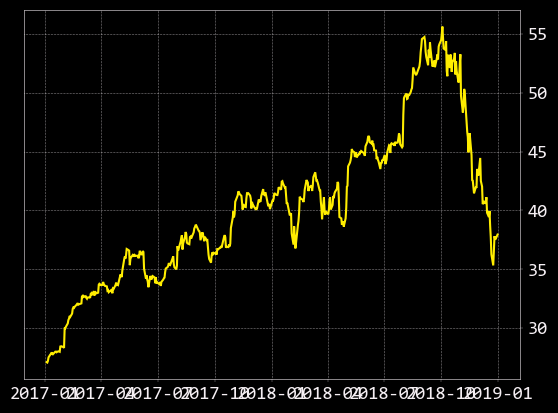

In [93]:
plt.plot(test["Close"])

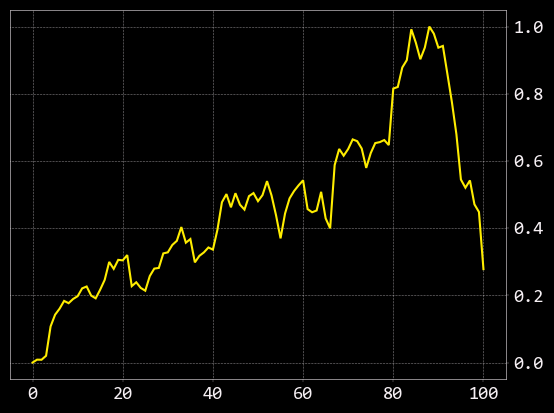

In [ ]:
plt.plot(y_test)